# part 1

In [ ]:
!pip install helpers

In [ ]:
!pip install  spotipy

     |████████████████████████████████| 138 kB 42.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#upload font ภาษาไทย
#from google.colab import files
#uploaded = files.upload()

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('darkgrid')
#sns.set_theme()
%matplotlib inline

!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size=20)

In [ ]:
mpl.__version__

'3.2.2'

In [ ]:
cid = '8b6fdf4ee4aa4ea9a4d475baea5838a5'
secret = '2999511ed428443291585bbddca81299'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
def call_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]


        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        track_inf0_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3
        
    return playlist_df

In [ ]:
def get_songs_features(ids):

    meta = sp.track(ids)
    release_date = meta['album']['release_date']
    popularity = meta['popularity']
    track = [release_date, popularity]
    return track

1. Mood ความคิดถึง

#**STEP 1 dataframe**

##**ความคิดถึง**

In [ ]:
df_miss = call_playlist("spotify","37i9dQZF1DX7wnCfGfUD8C")

In [ ]:
date=[]
pop=[]
for id in df_miss["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_miss = pd.concat([df_miss, track_info_df], axis=1)
df_miss['year'] = pd.DatetimeIndex(df_miss['date']).year
df_miss= df_miss.drop('date', 1)

In [ ]:
df_miss

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Musketeers,Left Right And Something,ไกล,07ZIrtR00m3t9AcmeRZ7vQ,0.388,0.660,8,-6.303,1,0.0289,0.000004,0.1410,0.655,96.036,53,2015
1,Ink Waruntorn,ลบไม่ได้ช่วยให้ลืม (Erase),ลบไม่ได้ช่วยให้ลืม (Erase),5AMYykC6sdveY7NfwHNUm4,0.533,0.725,8,-5.350,1,0.1210,0.000000,0.3030,0.590,163.941,59,2020
2,Hers,ยังคงคอย,ยังคงคอย,7tFrJ1JPTVmQKVU5XlGQdb,0.784,0.268,2,-14.390,1,0.0311,0.000571,0.1110,0.569,91.991,53,2017
3,SIN,เรื่องจริง,Rueang Ching,7N1mCWyLnYXfi3AXagJCNo,0.557,0.295,5,-12.706,1,0.0355,0.002010,0.1110,0.133,76.061,52,2012
4,PORTRAIT,เพลงที่เธอทิ้งไว้,เพลงที่เธอทิ้งไว้,0AImXQjGCKbe4UnEdTDUmz,0.628,0.816,9,-6.162,1,0.1110,0.000001,0.1340,0.467,163.987,37,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Benzalert,ใยห่วง,ใยห่วง,02iSdwd6FCkJBhbMRy4S6P,0.638,0.426,5,-7.717,1,0.0542,0.000378,0.0745,0.662,167.992,17,2020
96,Namm Ronnadet,อยู่กับความคิดถึง,อยู่กับความคิดถึง,6AA1MguwfVfqRPwCDdYIXZ,0.740,0.440,9,-8.356,1,0.0776,0.000000,0.1130,0.612,140.061,30,2017
97,Kanomroo,นาซ่าก็พาเธอกลับมาไม่ได้,นาซ่าก็พาเธอกลับมาไม่ได้,5twbyoR6cGxQi76xBpAyqA,0.644,0.601,6,-7.048,1,0.0348,0.000000,0.1390,0.427,92.995,25,2019
98,Singular,The White Room,24.7 (Twenty Four Seven),3eJn6bqJWYz9X1Pt7JPIm7,0.641,0.592,7,-6.216,0,0.0378,0.000000,0.1990,0.418,126.016,28,2010


##**10ปีกับรักแสนเศร้า**

In [ ]:
df_sad = call_playlist("spotify","37i9dQZF1DX2P6tBdicPOd")

In [ ]:
date=[]
pop=[]
for id in df_sad["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_sad = pd.concat([df_sad, track_info_df], axis=1)
df_sad['year'] = pd.DatetimeIndex(df_sad['date']).year
df_sad= df_sad.drop('date', 1)

In [ ]:
df_sad.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,SIN,เรื่องจริง,Rueang Ching,7N1mCWyLnYXfi3AXagJCNo,0.557,0.295,5,-12.706,1,0.0355,0.002010,0.1110,0.133,76.061,52,2012
1,Singto Numchok,Lucky,ฉันจะมีเธออยู่,5kLMUdQLeROTIjQcg34svY,0.609,0.319,9,-9.995,1,0.0271,0.000000,0.1160,0.286,137.008,43,2014
2,ETC.,เปลี่ยน,เธอคือใคร,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.000000,0.0985,0.338,133.989,46,2007
3,Gene Kasidit,BLONDE,ร W8,3zc9UfgETcTMGiazW58Klg,0.473,0.848,4,-4.061,1,0.0296,0.000000,0.0991,0.396,160.012,53,2014
4,Polycat,80 Kisses,เป็นเพราะฝน,7K41SevJ4ihWtiOiF1eAak,0.579,0.563,9,-5.290,1,0.0259,0.000009,0.3040,0.359,135.955,52,2016


##**ร้องไห้หนักมาก**

In [ ]:
df_cry = call_playlist("spotify","37i9dQZF1DX4tHo2ftQyun")

In [ ]:
date=[]
pop=[]
for id in df_cry["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_cry = pd.concat([df_cry, track_info_df], axis=1)
df_cry['year'] = pd.DatetimeIndex(df_cry['date']).year
df_cry= df_cry.drop('date', 1)

In [ ]:
df_cry.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Three Man Down,ถ้าเธอรักฉันจริง,ถ้าเธอรักฉันจริง,2vA7CHG08LDzeMDAuPnUQg,0.423,0.713,3,-5.021,1,0.0416,0,0.0884,0.471,170.087,61,2020
1,ONEONE,วังวน(LOOP),วังวน(LOOP),3AoCPB8NMxZcxzXKswXfpY,0.469,0.513,11,-7.736,1,0.0308,0,0.1200,0.648,182.001,48,2019
2,WANYAi,เงา,เงา,6yrxuUnWFv72Veb9jphPLL,0.523,0.615,6,-6.549,1,0.0398,0,0.1450,0.534,162.059,54,2020
3,SIN,เรื่องจริง,Rueang Ching,7N1mCWyLnYXfi3AXagJCNo,0.557,0.295,5,-12.706,1,0.0355,0.00201,0.1110,0.133,76.061,52,2012
4,Ton Thanasit,Long Trip,Long Trip,3If9VlKDZp8gbzuEyRY7fm,0.583,0.376,7,-8.462,1,0.0312,0,0.1490,0.327,73.879,46,2020


##**เป็นท้อ**

In [ ]:
df_dis = call_playlist("spotify","37i9dQZF1DWTlbUjNA5MKD")

In [ ]:
date=[]
pop=[]
for id in df_dis["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_dis = pd.concat([df_dis, track_info_df], axis=1)
df_dis['year'] = pd.DatetimeIndex(df_dis['date']).year
df_dis= df_dis.drop('date', 1)

In [ ]:
df_dis.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,NONT TANONT,เพลงประกอบละคร กระเช้าสีดา,พิง - เพลงประกอบละคร กระเช้าสีดา,6MjLHdROTcaU22k7B6gxR6,0.614,0.528,10,-7.693,1,0.0346,0,0.1050,0.460,132.075,70,2021
1,ALLY,ALLY IN THE 90’S,ดาว (Star) [ALLY IN THE 90’S],337F0oNS6dZKb8UlkZgUkB,0.536,0.311,9,-8.327,1,0.0344,3.96e-06,0.1010,0.322,132.141,44,2021
2,Mirrr,ดอกไม้ไฟ (Firework),ดอกไม้ไฟ - Firework,5SolgEp0EAXjruwQdszykB,0.771,0.777,1,-6.271,0,0.2560,0,0.1720,0.821,130.006,65,2021
3,F.HERO,จำเลยรัก (Defendant Of Love),จำเลยรัก - Defendant Of Love,0AGhwXsWpVOwjHY5yf4dtD,0.695,0.751,11,-5.242,0,0.1540,0,0.0921,0.778,79.996,64,2020
4,Earth Patravee,ห้ามใจไม่อยู่,ห้ามใจไม่อยู่,2hteglfTJmJmqac9pXz7rb,0.702,0.641,0,-5.853,1,0.1730,0.00579,0.1180,0.467,166.017,56,2021


##**เพลงรักไม่เคยลืม**

In [ ]:
df_love = call_playlist("spotify","37i9dQZF1DWTI9rv1dQs8H")

In [ ]:
date=[]
pop=[]
for id in df_love["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_love

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
0,Danupol Kaewkarn,ห้องสีขาว,โอ๊ย โอ๊ย,2uVDxOfcP5JtspJ3YZAPBy,0.427,0.441,6,-11.744,1,0.0350,0.057000,0.3060,0.333,143.996
1,Various Artists,Hot Vote Vol.2,หลับตา,4X8QjxXDiOGYbmH9zi6XYb,0.620,0.214,10,-14.417,1,0.0268,0.004240,0.0975,0.193,82.235
2,Bird Thongchai,บูมเมอแรง,หมอกหรือควัน,0JsrgKbvRPJVGieuKP3luQ,0.594,0.705,7,-6.416,1,0.0260,0.000027,0.4070,0.858,107.686
3,Various Artists,15 ปี Green Wave 1,เจ้าสาวที่กลัวฝน,6Zp2VDWYi4rv6QdHNpWXQo,0.774,0.524,1,-9.142,0,0.0283,0.000008,0.0556,0.751,114.758
4,Asanee & Wasan,สับปะรด,คงเดิม,5gEDVRgPGlrYmi4KRP154V,0.707,0.603,7,-9.533,1,0.0267,0.000001,0.0980,0.756,119.995
5,วารุณี สุนทรีสวัสดิ์,"เพลงดังหาฟังยาก, Vol. 11: วารุณี สุนทรีสวัสดิ์",กอดฉัน,0emrrMUx4EwpyBuyOQKXR9,0.451,0.480,11,-6.383,1,0.0260,0.000008,0.1230,0.328,157.901
6,Viyada Komarakul Na Nakorn,เพียงแค่ใจเรารักกัน,เพียงแค่ใจเรารักกัน,1PpKRuyNMgJN284DmBQSRn,0.784,0.633,2,-4.620,1,0.0322,0.000000,0.1000,0.508,100.032
7,Danupol Kaewkarn,ฝันสีทอง Audiophile Remastered,แสนรัก,0BgdNe1BiMAF3F9qI0w5uN,0.278,0.419,0,-7.338,1,0.0287,0.678000,0.1440,0.253,151.195
8,คีรีบูน,รอวันฉันรักเธอ,รอวันฉันรักเธอ,7ktMsKo8anRMEgpRr8sysO,0.537,0.420,9,-10.474,1,0.0319,0.001430,0.1590,0.293,81.418
9,Bird Thongchai,The Very Best Of Bird,ด้วยรักและผูกพัน,3ItLXQ6yOuGxShlypeRJHU,0.624,0.648,9,-6.060,1,0.0291,0.000000,0.1230,0.375,99.414


##**ฟังเพลินตอนทำงาน**

In [ ]:
df_work = call_playlist("spotify","37i9dQZF1DWUeFzTSNBzKM")

In [ ]:
date=[]
pop=[]
for id in df_work["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_work = pd.concat([df_work, track_info_df], axis=1)
df_work['year'] = pd.DatetimeIndex(df_work['date']).year
df_work= df_work.drop('date', 1)

In [ ]:
df_work

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,NONT TANONT,เพลงประกอบละคร กระเช้าสีดา,พิง - เพลงประกอบละคร กระเช้าสีดา,6MjLHdROTcaU22k7B6gxR6,0.614,0.528,10,-7.693,1,0.0346,0,0.1050,0.460,132.075,70,2021
1,Three Man Down,ข้างกัน (City) [feat. ออม TELExTELEXs],ข้างกัน (City),2XDCs8vAubxRe8mO1A0eTa,0.469,0.727,2,-7.484,1,0.0263,0.000918,0.2700,0.341,176.011,47,2020
2,Ink Waruntorn,ลบไม่ได้ช่วยให้ลืม (Erase),ลบไม่ได้ช่วยให้ลืม (Erase),5AMYykC6sdveY7NfwHNUm4,0.533,0.725,8,-5.350,1,0.1210,0,0.3030,0.590,163.941,59,2020
3,Earth Patravee,ห้ามใจไม่อยู่,ห้ามใจไม่อยู่,2hteglfTJmJmqac9pXz7rb,0.702,0.641,0,-5.853,1,0.1730,0.00579,0.1180,0.467,166.017,56,2021
4,Blackbeans,You (Are) Mean a Lot to Me,Wish,1ecud9LC1clhcuhjLIyyMB,0.504,0.538,0,-8.745,1,0.0255,0.0141,0.1160,0.138,136.006,66,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,WANYAi,อยู่คนเดียว,อยู่คนเดียว,04BVwXNoTsEKZmj14Vm5HM,0.532,0.422,7,-9.456,1,0.0837,0,0.0762,0.581,182.063,17,2021
96,TRINITY,TRINITY : THE 1ST MINI ALBUM “THE ELEMENTS”,Hidden Track,5Kh1HU6V2jL3CZeMW3IDtW,0.659,0.577,1,-5.810,0,0.0385,0,0.1670,0.676,137.846,50,2019
97,Bodyslam,วิชาตัวเบา,ความหมาย,688G24t6YYgCkHHItWDnsf,0.556,0.339,2,-7.177,1,0.0268,0,0.1320,0.253,81.180,33,2019
98,25 hours,Colour In White,เที่ยงคืนสิบห้านาที,0yTvHxDwFxNuLgi5KdtgMH,0.620,0.713,2,-5.860,1,0.0285,6.9e-05,0.1010,0.480,94.988,47,2015


##**อารมณ์ทะเล**

In [ ]:
df_sea = call_playlist("spotify","37i9dQZF1DWZBKvnmbtGSw")

In [ ]:
date=[]
pop=[]
for id in df_sea["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_sea = pd.concat([df_sea, track_info_df], axis=1)
df_sea['year'] = pd.DatetimeIndex(df_sea['date']).year
df_sea= df_sea.drop('date', 1)

In [ ]:
df_sea

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Whatcharawale,Legend,ทราย,1ZvsNPtC7kz7PHh2XZOTln,0.653,0.739,10,-6.683,1,0.1930,0,0.3580,0.811,140.062,57,2016
1,Singto Numchok,I JUST WANNA PEN FAN YOU DAI BOR ? (อ้ายจัสวอน...,I JUST WANNA PEN FAN YOU DAI BOR ? (อ้ายจัสวอน...,7DLdnWK7OYDsRf7I15Ze0L,0.764,0.566,1,-7.090,0,0.0932,1.59e-05,0.2330,0.827,87.976,67,2021
2,Billkin,โคตรพิเศษ (From “แปลรักฉันด้วยใจเธอ”),โคตรพิเศษ - (From “แปลรักฉันด้วยใจเธอ”),6MVbuOWvXHbPHtVwScK6M1,0.513,0.469,7,-8.166,1,0.0411,0,0.1220,0.433,177.886,11,2020
3,Earth Patravee,ห้ามใจไม่อยู่,ห้ามใจไม่อยู่,2hteglfTJmJmqac9pXz7rb,0.702,0.641,0,-5.853,1,0.1730,0.00579,0.1180,0.467,166.017,56,2021
4,ROOFTOP,ถ้าฉันเป็นเธอ,ถ้าฉันเป็นเธอ,5CyYkeczaCPesQQMICCbmp,0.779,0.613,10,-7.207,1,0.0301,0,0.0954,0.682,102.013,46,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Various Artists,BOYFRIENDS,เหงาแหละ (First Time Lonely),7Ax43OS0HUPRYjrXWYPqHe,0.702,0.426,7,-10.209,1,0.0537,9.51e-05,0.2850,0.405,77.984,40,2020
76,Lula,Urban Lullaby,ในวันที่เราต้องไกลห่าง,0o9QUgt3bWwQLDJrAg7Quc,0.810,0.666,1,-7.169,0,0.0716,0.000183,0.2940,0.908,160.060,33,2008
77,Whal & Dolph,PAR-K,ไม่รู้ทำไม,1lWjw2MgiWcvuy5rSuQ11b,0.622,0.679,7,-6.537,1,0.0273,0.000134,0.2730,0.832,110.030,49,2019
78,Namm Ronnadet,แอบ,แอบ,1ouhec3dkguVevVmcTIFtC,0.758,0.764,7,-4.587,1,0.0451,0,0.1060,0.667,98.025,33,2019


##**เพลงไทยสายชิลล์**

In [ ]:
df_chill = call_playlist("spotify","37i9dQZF1DX0bGxKepv6YZ")

In [ ]:
date=[]
pop=[]
for id in df_chill["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_chill = pd.concat([df_chill, track_info_df], axis=1)
df_chill['year'] = pd.DatetimeIndex(df_chill['date']).year
df_chill= df_chill.drop('date', 1)

In [ ]:
df_chill

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Whatcharawale,Legend,น้อย,1LOAgM7DIxdprmoaoo990N,0.697,0.356,9,-9.217,1,0.1500,0.000012,0.1270,0.601,66.995,55,2016
1,Patrickananda,Oasis,Oasis,0h48eAfbK0dlgnTf3x1lmK,0.609,0.302,6,-8.700,1,0.0322,0.000000,0.1050,0.426,131.636,54,2021
2,Various Artists,Music is forever vol.2 BOSSA VACAY,Event,4RH90C098o1YD0CLRRmWNB,0.486,0.526,4,-8.348,1,0.1700,0.000057,0.1390,0.547,199.837,52,2016
3,Various Artists,MUSIC MOST WANTED,ให้ฉันดูแลเธอ - เพลงประกอบละคร ผู้ใหญ่ลีกับนางมา,1R9yHz1Wl8k2ZkABypxzv5,0.680,0.671,10,-9.462,1,0.0251,0.000190,0.1020,0.789,94.038,40,2013
4,Various Artists,All You Need is Love 3,กะทันหัน,71rZCPjOAU8WBlXYPHNgRu,0.736,0.585,9,-7.578,1,0.0300,0.000000,0.1080,0.731,95.013,46,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,ยุ่น ภูษณุ วงศาวณิชชากร,บ้าไม่เหงา,บ้าไม่เหงา,1aD4qE5Rwb1AmI7u6TtqRn,0.607,0.247,9,-11.994,1,0.0301,0.000097,0.1030,0.148,154.030,31,2021
76,KRAM AMARIT,กลิ่นจางๆ (Scent),กลิ่นจางๆ (Scent),6URdEXEqcC1wAbjLEK45Xy,0.722,0.235,9,-14.140,1,0.0376,0.155000,0.0905,0.287,92.995,30,2021
77,The Oat Oat,รักแรก,รักแรก,528HMckPZGN4y3ciypJNok,0.867,0.398,5,-7.477,1,0.0380,0.000000,0.1340,0.619,97.978,30,2021
78,Potato,Focus,ขอบใจ,2GpaUa8rv5aDLMvdtpdgmo,0.600,0.458,4,-5.783,1,0.0232,0.000000,0.1200,0.124,104.996,30,2004


##**เหนื่อยนักพักก่อน**

In [ ]:
df_tired = call_playlist("spotify","37i9dQZF1DX2d9wHUNcEXV")

In [ ]:
date=[]
pop=[]
for id in df_tired["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_tired = pd.concat([df_tired, track_info_df], axis=1)
df_tired['year'] = pd.DatetimeIndex(df_tired['date']).year
df_tired= df_tired.drop('date', 1)

In [ ]:
df_tired

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,Pause,Bakery Best Selection Pause,ดาว - Cover version,7JT0xvRdL46U36JqiCTfWS,0.468,0.245,1,-9.323,1,0.0275,0.020500,0.1030,0.0833,74.361,43,2015
1,Polycat,80 Kisses,เพื่อนไม่จริง,05WHgjtWx32x40VmFkLnOd,0.676,0.726,11,-4.953,0,0.0339,0.000000,0.0459,0.7340,116.985,53,2016
2,Marc Tatchapon,มาตรฐานสูง,มาตรฐานสูง,6yv3mmMy77HFmlgXtr3rmu,0.579,0.581,8,-6.717,1,0.0283,0.000002,0.1360,0.2000,79.981,45,2019
3,Bell Supol,ไร้สถานะ,ไร้สถานะ,26frjykiXI0yJAYrW8idHQ,0.653,0.441,0,-11.113,1,0.2440,0.000000,0.1850,0.7230,160.088,38,2020
4,Earth Patravee,ห้ามใจไม่อยู่,ห้ามใจไม่อยู่,2hteglfTJmJmqac9pXz7rb,0.702,0.641,0,-5.853,1,0.1730,0.005790,0.1180,0.4670,166.017,56,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mola Mola Sunshine!,ฉันน่าจะบอกรักไป...ในวันที่เธอบอกรักมา (Acoust...,ฉันน่าจะบอกรักไป...ในวันที่เธอบอกรักมา - Acous...,1glL2xlOB9vcQPF5kj5Xia,0.372,0.317,1,-10.340,1,0.0346,0.000000,0.0963,0.3100,174.511,42,2019
96,Zom Marie,หรือฉันคิดไปเอง,หรือฉันคิดไปเอง,3EMXuZ7n0lgQSNSsVk5d3n,0.638,0.677,5,-5.094,1,0.0604,0.000000,0.2630,0.5350,140.003,53,2020
97,Marc Tatchapon,ช่วยทำว่ายังรัก,ช่วยทำว่ายังรัก,1njEZSvzGvx38GWoBxfAWy,0.655,0.696,4,-6.316,0,0.0465,0.000001,0.1550,0.6320,75.075,41,2021
98,Earth Patravee,ขอโทษดาว,ขอโทษดาว,5fDc3i3gwjyNCBbln2ZoVn,0.768,0.457,8,-5.991,1,0.0307,0.000002,0.1370,0.3180,123.943,47,2019


##**ชิลล์ฮอป**

In [ ]:
df_hop = call_playlist("spotify","37i9dQZF1DX1J86FNezcNG")

In [ ]:
date=[]
pop=[]
for id in df_hop["track_id"]:
    date.append(get_songs_features(id)[0])
    pop.append(get_songs_features(id)[1])
track_info_df = pd.DataFrame( list(zip(date, pop)),columns=['date','popularity'])

In [ ]:
df_hop = pd.concat([df_hop, track_info_df], axis=1)
df_hop['year'] = pd.DatetimeIndex(df_hop['date']).year
df_hop= df_hop.drop('date', 1)

In [ ]:
df_hop

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year
0,SOYBAD,SOYBAD Vol.1,ฟ้าร้อง,0aJFeshtq8VKT80mKsQJII,0.582,0.310,9,-11.853,1,0.0575,0,0.1160,0.7620,74.822,50,2020
1,Gavin D,3:30,3:30,4iHItIN4tXGJl1t3zJbFX9,0.674,0.715,4,-4.895,1,0.0402,0.00028,0.0883,0.4330,72.014,34,2021
2,MEYOU,ถาม,ถาม,562Uobw3ADMQAw1sONu3MK,0.568,0.471,7,-8.696,1,0.0957,0.000271,0.1100,0.3830,81.905,51,2021
3,HANXPOND x 2T FLOW x SARAN,เก็บข้าวของ,เก็บข้าวของ,6YM4MHasgqZg5STe8ZmIpy,0.844,0.406,6,-6.828,0,0.0447,0,0.1750,0.6790,84.016,45,2020
4,PUNYARB,คำถาม,คำถาม,15Xn4r9FY3725iHIfyq5hE,0.800,0.524,10,-8.313,1,0.0535,0,0.0787,0.4860,106.985,66,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jayrun,สักวัน,สักวัน,2nDDLc6V7i8vnq1qq4IY2H,0.737,0.363,1,-12.533,1,0.0693,0.000264,0.1050,0.0514,137.950,31,2019
96,SKP,Not me,Not me,4gjECXXGkbRXIYN5IaCCPe,0.831,0.276,5,-10.211,0,0.0574,0.329,0.0579,0.3850,121.949,21,2021
97,SAMS,"สิ้นปีแล้วนะ Feat.Ptrp Studio,NICEKY","สิ้นปีแล้วนะ Feat.Ptrp Studio,NICEKY",5WGtdBzR6eflfhjCyf72B5,0.873,0.286,0,-12.033,0,0.0589,3.25e-06,0.1310,0.4720,113.981,23,2021
98,Saran,Batman Begin,ไม่คิดถึงฉันไม่คิดถึงเธอ,7xyG6m36YenE2Yhljgm8yp,0.675,0.248,1,-13.284,0,0.0574,8.36e-05,0.1000,0.5360,165.965,41,2021


#**STEP 2 save to csv**

In [ ]:
df_miss.to_csv("missed.csv", index=False)

In [ ]:
df_work.to_csv("worked.csv", index=False)

In [ ]:
df_sea.to_csv("sea.csv", index=False)

In [ ]:
df_chill.to_csv("chilled.csv", index=False)

In [ ]:
df_tired.to_csv("tired.csv", index=False)

In [ ]:
df_hop.to_csv("hopped.csv", index=False)

#**STEP 3 EDA**

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_theme()
%matplotlib inline

**EDA Missed**

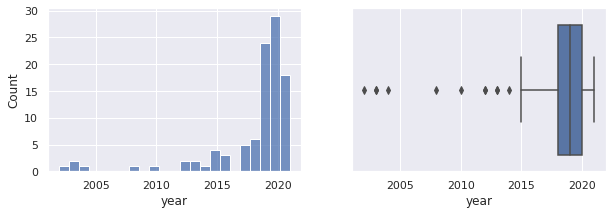

In [ ]:
#Release year
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_miss)
sns.boxplot(ax=ax[1],x='year', data=df_miss)

In [ ]:
def plot_features_all(data):
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Miss')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

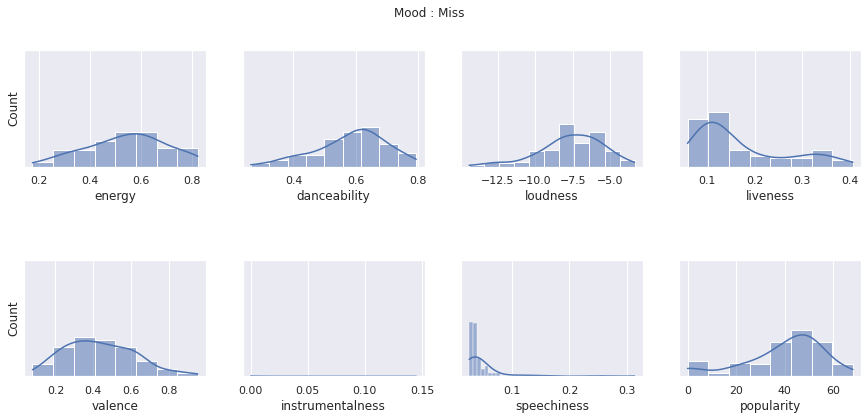

In [ ]:
plot_features_all(df_miss)

##**EDA Worked**

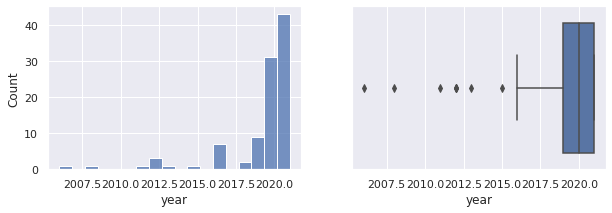

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_work)
sns.boxplot(ax=ax[1],x='year', data=df_work)

In [ ]:
def plot_features_all(data):#ฟังเพลินตอนทำงาน
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Working')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

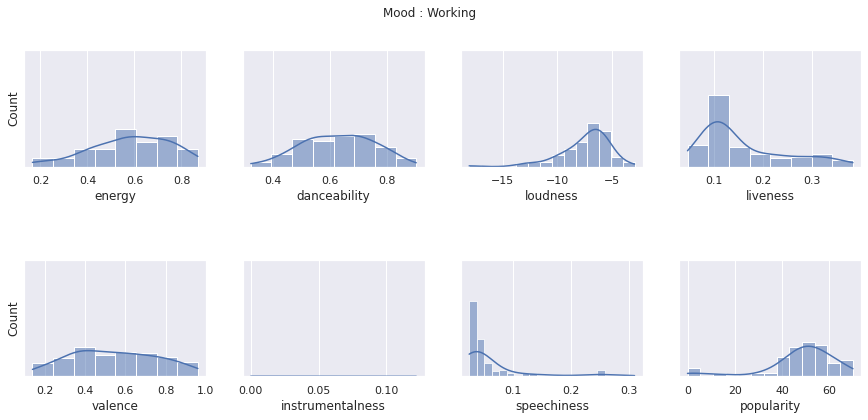

In [ ]:
plot_features_all(df_work)

##**EDA Sea**

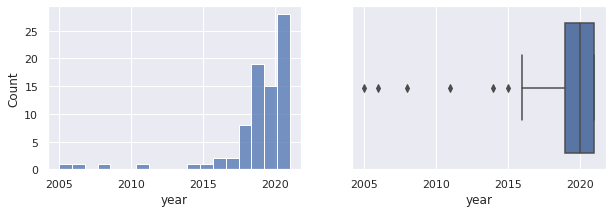

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_sea)
sns.boxplot(ax=ax[1],x='year', data=df_sea)

In [ ]:
def plot_features_all(data):#อารมณ์ทะเล
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Sea')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

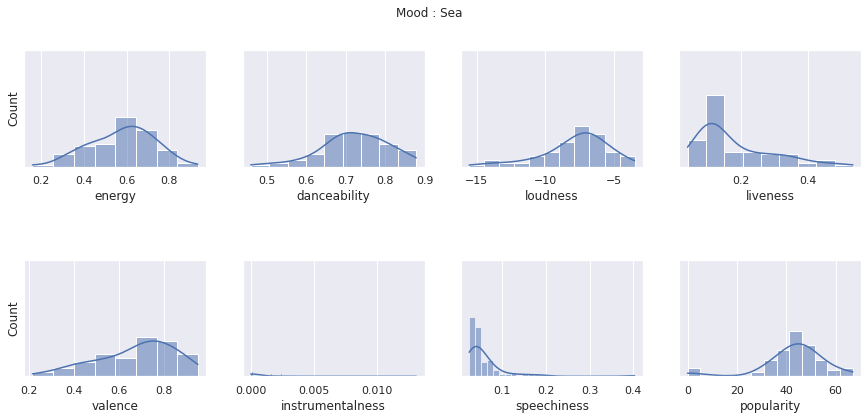

In [ ]:
plot_features_all(df_sea)

##**EDA Chill**

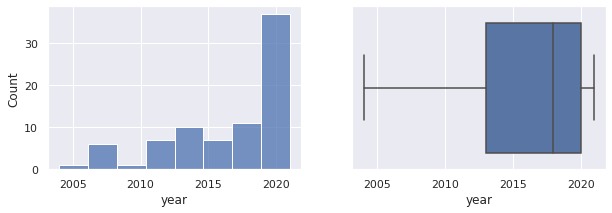

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_chill)
sns.boxplot(ax=ax[1],x='year', data=df_chill)

In [ ]:
def plot_features_all(data):#เพลงไทยสายชิลล์
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Chill')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

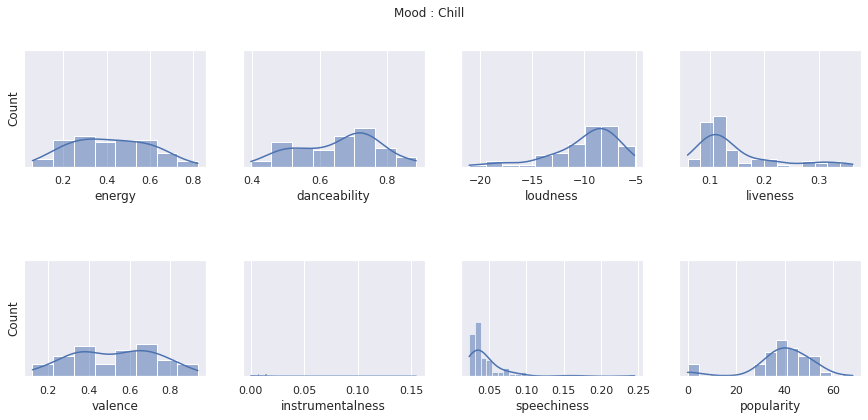

In [ ]:
plot_features_all(df_chill)

##**EDA Tired**

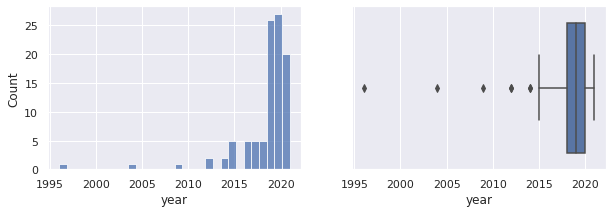

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_tired)
sns.boxplot(ax=ax[1],x='year', data=df_tired)

In [ ]:
def plot_features_all(data):#เหนื่อยนักพักก่อน
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Tired')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

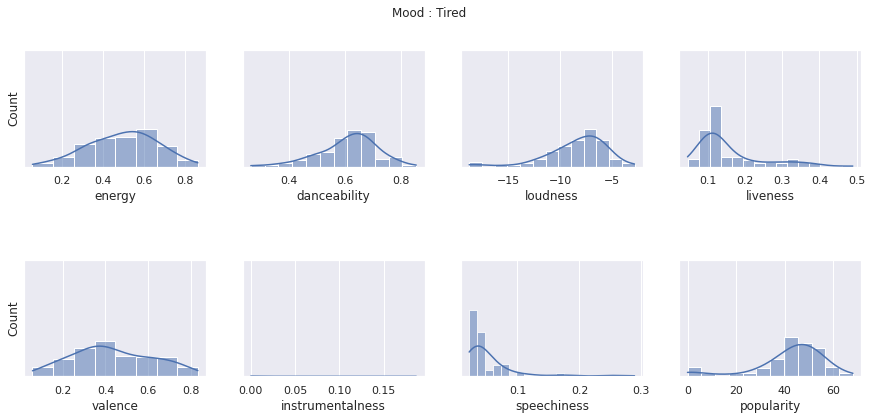

In [ ]:
plot_features_all(df_tired)

##**EDA Hop**

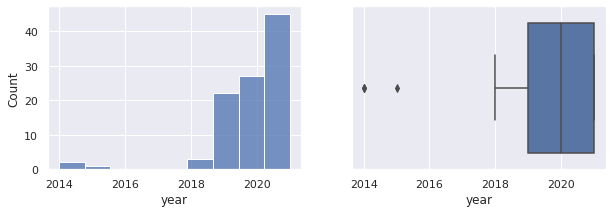

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df_hop)
sns.boxplot(ax=ax[1],x='year', data=df_hop)

In [ ]:
def plot_features_all(data):#ชิลล์ฮอป
    fig, ax = plt.subplots(2,4, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Hop')
    sns.histplot(ax=ax[0,0], x= 'energy', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'danceability', data=data, kde=True)
    sns.histplot(ax=ax[0,2], x= 'loudness', data=data, kde=True)
    sns.histplot(ax=ax[0,3], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valence', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,2], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[1,3], x= 'popularity', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

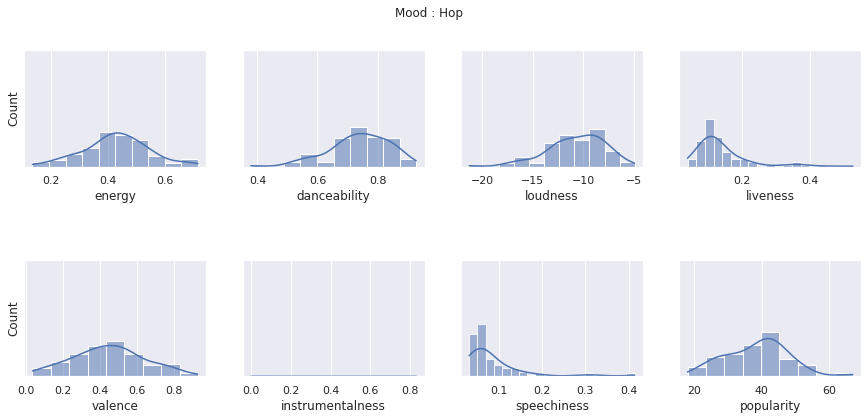

In [ ]:
plot_features_all(df_hop)

# part 2 Df ที่รวมทุก mood

In [ ]:
df_all=pd.concat([df_work,df_sea,df_chill,df_tired,df_hop],keys=[0,1,2,3,4])

In [ ]:
df_all

artist                                   album  ... popularity  year
0 0      NONT TANONT              เพลงประกอบละคร กระเช้าสีดา  ...         70  2021
  1   Three Man Down  ข้างกัน (City) [feat. ออม TELExTELEXs]  ...         47  2020
  2    Ink Waruntorn              ลบไม่ได้ช่วยให้ลืม (Erase)  ...         59  2020
  3   Earth Patravee                           ห้ามใจไม่อยู่  ...         56  2021
  4       Blackbeans              You (Are) Mean a Lot to Me  ...         66  2020
...              ...                                     ...  ...        ...   ...
4 95          Jayrun                                  สักวัน  ...         31  2019
  96             SKP                                  Not me  ...         21  2021
  97            SAMS    สิ้นปีแล้วนะ Feat.Ptrp Studio,NICEKY  ...         23  2021
  98           Saran                            Batman Begin  ...         41  2021
  99         Zamio P                          ໜ້າຝົນແລ້ວເດີ້  ...         27  2021

[460 rows x 16 columns]

In [ ]:
df_all.to_csv("รวมเพลงครึ่งหลัง.csv", index=False)

# STEP 4 วิเคราะห์ feature

In [ ]:
def plot_features_all2(data):
    fig, ax = plt.subplots(2,2, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : All Song')
    sns.histplot(ax=ax[0,0], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'tempo', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

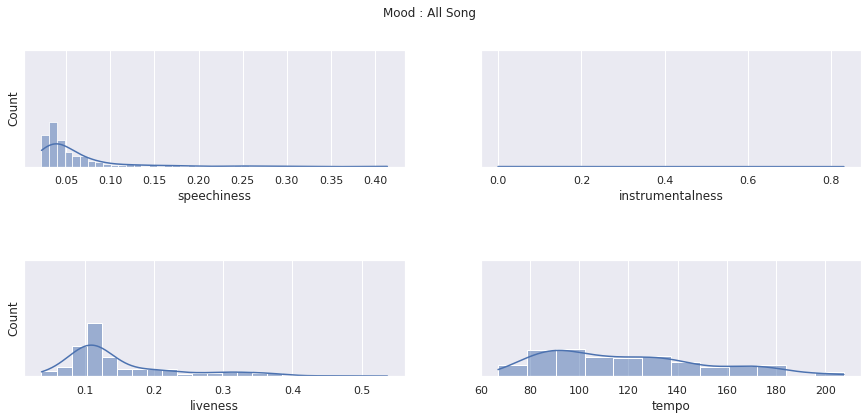

In [ ]:
plot_features_all2(df_all)

##feature ความคิดถึง

In [ ]:
def plot_features_all2(data):
    fig, ax = plt.subplots(2,2, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Miss')
    sns.histplot(ax=ax[0,0], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'tempo', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

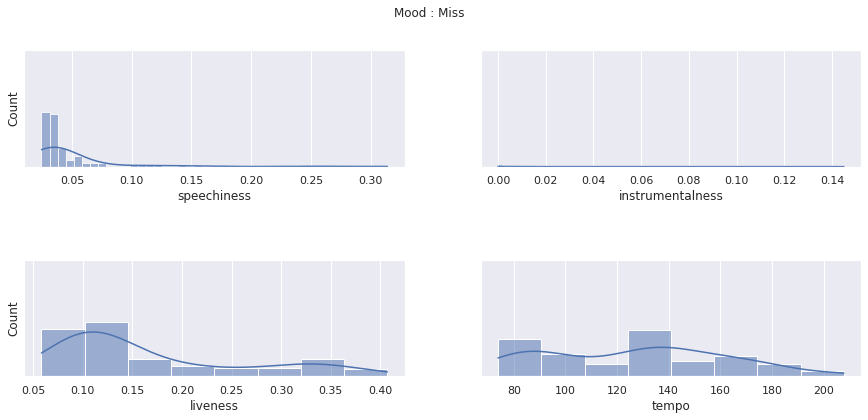

In [ ]:
plot_features_all2(df_miss)

##feature 10ปีกับรักแสนเศร้า

In [ ]:
def plot_features_all2(data):
    fig, ax = plt.subplots(2,2, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Sad')
    sns.histplot(ax=ax[0,0], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'tempo', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

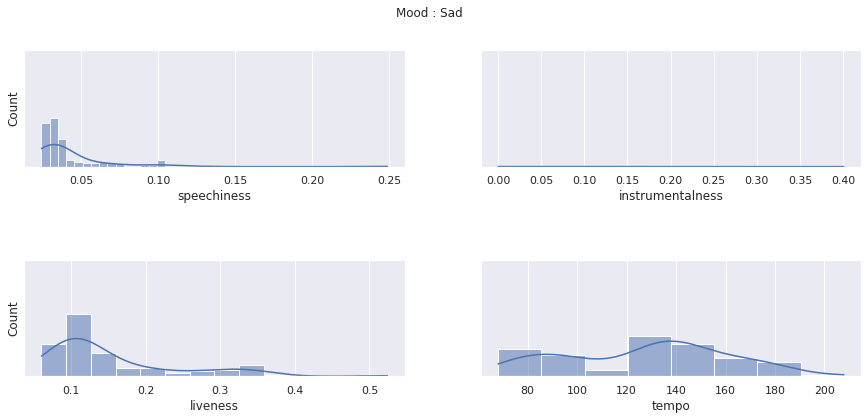

In [ ]:
plot_features_all2(df_sad)

##feature ร้องไห้หนักมาก

In [ ]:
def plot_features_all2(data):
    fig, ax = plt.subplots(2,2, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Cry')
    sns.histplot(ax=ax[0,0], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'tempo', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

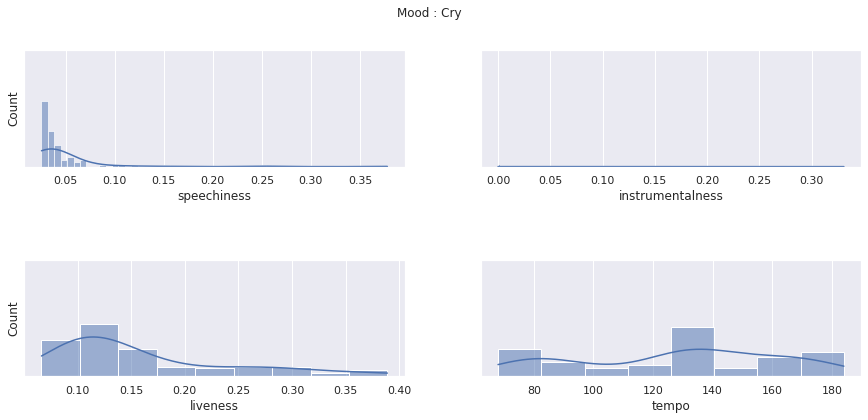

In [ ]:
plot_features_all2(df_cry)

##feature เป็นท้อ

In [ ]:
def plot_features_all2(data):
    fig, ax = plt.subplots(2,2, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Discourage')
    sns.histplot(ax=ax[0,0], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'tempo', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

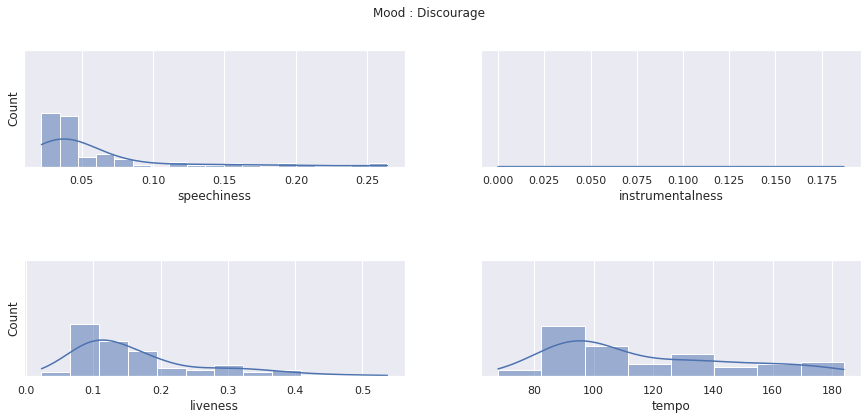

In [ ]:
plot_features_all2(df_dis)

##feature เพลงรักไม่เคยลืม

In [ ]:
def plot_features_all2(data):
    fig, ax = plt.subplots(2,2, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Love')
    sns.histplot(ax=ax[0,0], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'tempo', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

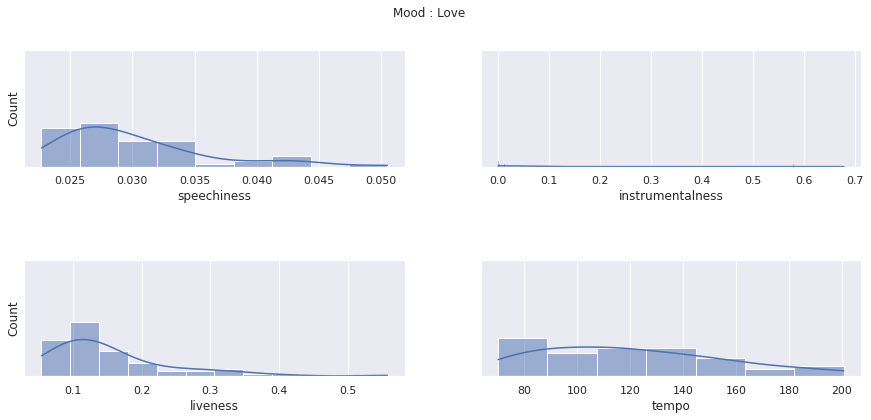

In [ ]:
plot_features_all2(df_love)

##feature ฟังเพลินตอนทำงาน

In [ ]:
def plot_features_all2(data):
    fig, ax = plt.subplots(2,2, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Working')
    sns.histplot(ax=ax[0,0], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'tempo', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

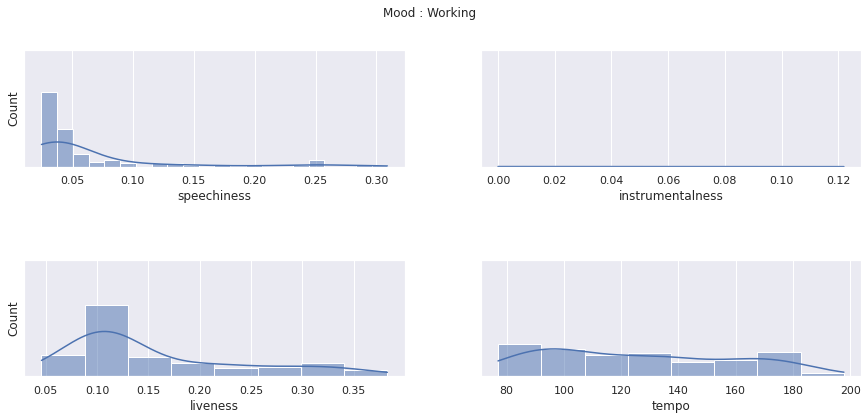

In [ ]:
plot_features_all2(df_work)

##feature อารมณ์ทะเล

In [ ]:
def plot_features_all2(data):
    fig, ax = plt.subplots(2,2, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Sea')
    sns.histplot(ax=ax[0,0], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'tempo', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

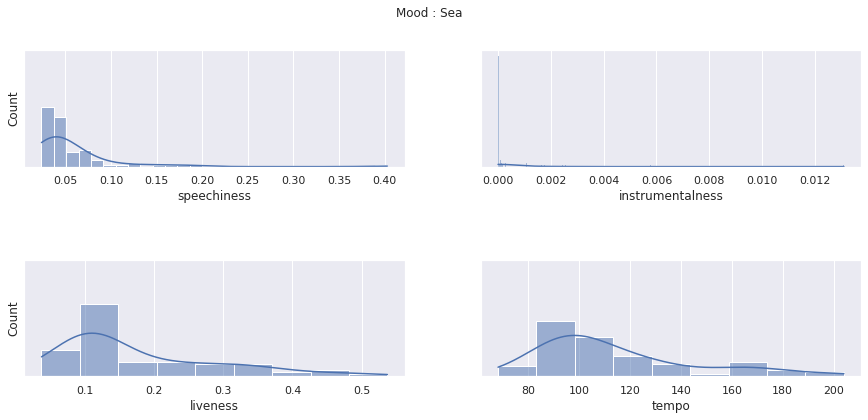

In [ ]:
plot_features_all2(df_sea)

##feature เพลงไทยสายชิลล์

In [ ]:
def plot_features_all2(data):
    fig, ax = plt.subplots(2,2, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Chill')
    sns.histplot(ax=ax[0,0], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'tempo', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

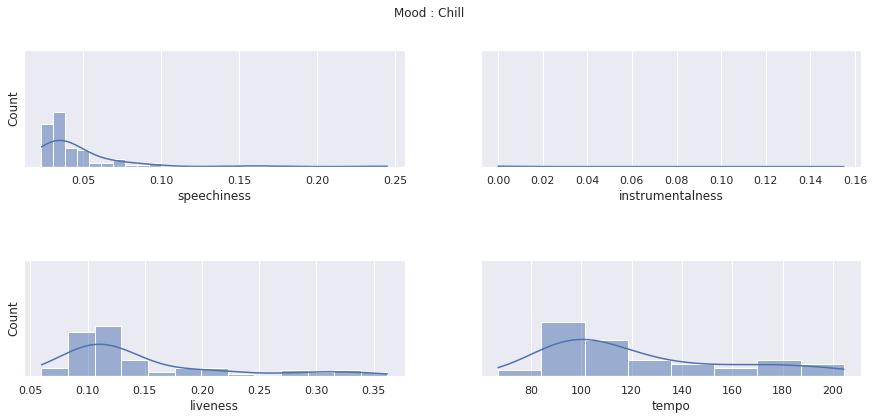

In [ ]:
plot_features_all2(df_chill)

##feature เหนื่อยนักพักก่อน

In [ ]:
def plot_features_all2(data):#เหนื่อยนักพักก่อน
    fig, ax = plt.subplots(2,2, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Tired')
    sns.histplot(ax=ax[0,0], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'tempo', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

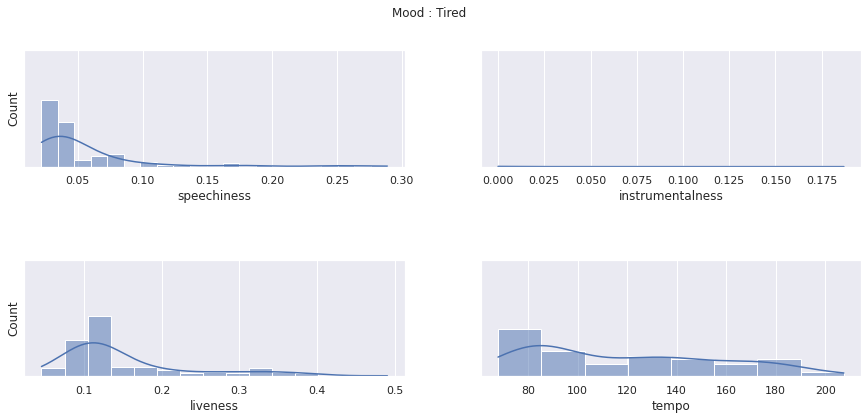

In [ ]:
plot_features_all2(df_tired)

##feature ชิลล์ฮอป

In [ ]:
def plot_features_all2(data):#ชิลล์ฮอป
    fig, ax = plt.subplots(2,2, figsize=(15,6),sharey=True)
    fig.suptitle('Mood : Hop')
    sns.histplot(ax=ax[0,0], x= 'speechiness', data=data, kde=True)
    sns.histplot(ax=ax[0,1], x= 'instrumentalness', data=data, kde=True)
    sns.histplot(ax=ax[1,0], x= 'liveness', data=data, kde=True)
    sns.histplot(ax=ax[1,1], x= 'tempo', data=data, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    #plt.xlabel('Attribute value')
    #plt.tight_layout()
    plt.subplots_adjust(hspace = 0.8)

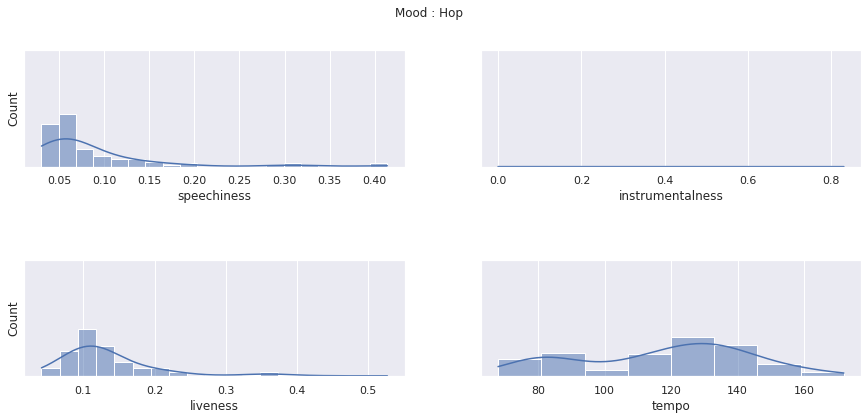

In [ ]:
plot_features_all2(df_hop)

#**STEP 5 Run Model**

In [101]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

features_for_mood = ['energy', 'liveness', 'tempo', 'speechiness',
                                     'acousticness', 'instrumentalness', 'danceability', 'duration_ms',
                                     'loudness', 'valence']



In [103]:
trainx = pd.read_csv('train.csv',index_col=0)
trainx.head()

,danceability,energy,key,loudness,valence,tempo,mode,label
542,0.626,0.870,10,-3.826,0.838,97.460,1,chill
715,0.579,0.563,9,-5.290,0.359,135.955,1,tired
739,0.430,0.720,10,-6.332,0.651,160.112,1,tired
681,0.757,0.657,1,-5.462,0.891,100.005,1,tired
119,0.753,0.606,0,-7.510,0.250,117.936,1,lovesong


In [104]:
trainy = trainx[['label']]
trainy

,label
542,chill
715,tired
739,tired
681,tired
119,lovesong
...,...
425,tired
869,lovesong
669,tired
833,lovesong


In [105]:
trainx = trainx.drop(['label'], axis=1)
trainx

,danceability,energy,key,loudness,valence,tempo,mode
542,0.626,0.870,10,-3.826,0.838,97.460,1
715,0.579,0.563,9,-5.290,0.359,135.955,1
739,0.430,0.720,10,-6.332,0.651,160.112,1
681,0.757,0.657,1,-5.462,0.891,100.005,1
119,0.753,0.606,0,-7.510,0.250,117.936,1
...,...,...,...,...,...,...,...
425,0.856,0.366,5,-8.774,0.335,92.078,1
869,0.690,0.453,4,-9.802,0.454,129.091,1
669,0.487,0.762,7,-7.004,0.353,154.033,1
833,0.637,0.411,9,-7.867,0.309,133.985,1


In [106]:
testx = pd.read_csv('test.csv',index_col=0)
testx.head()

,danceability,energy,key,loudness,valence,tempo,mode,label
612,0.589,0.380,8,-7.074,0.584,183.821,1,tired
232,0.741,0.371,4,-13.608,0.359,140.069,1,chill
650,0.404,0.518,5,-7.159,0.150,177.956,1,tired
54,0.570,0.553,8,-8.057,0.368,121.958,1,sad
134,0.739,0.303,3,-7.591,0.682,88.005,1,lovesong


In [107]:
testy = testx[['label']]
testy

,label
612,tired
232,chill
650,tired
54,sad
134,lovesong
...,...
126,lovesong
581,tired
268,chill
878,lovesong


In [108]:
testx = testx.drop(['label'], axis=1)
testx

,danceability,energy,key,loudness,valence,tempo,mode
612,0.589,0.380,8,-7.074,0.584,183.821,1
232,0.741,0.371,4,-13.608,0.359,140.069,1
650,0.404,0.518,5,-7.159,0.150,177.956,1
54,0.570,0.553,8,-8.057,0.368,121.958,1
134,0.739,0.303,3,-7.591,0.682,88.005,1
...,...,...,...,...,...,...,...
126,0.565,0.607,3,-10.643,0.784,204.050,1
581,0.634,0.480,9,-9.913,0.275,128.046,1
268,0.741,0.444,2,-10.661,0.166,104.924,0
878,0.394,0.833,1,-5.750,0.351,184.049,1


In [109]:
trainy.values.ravel()

array(['chill', 'tired', 'tired', 'tired', 'lovesong', 'tired', 'chill',
       'tired', 'chill', 'lovesong', 'sad', 'tired', 'chill', 'lovesong',
       'chill', 'tired', 'lovesong', 'tired', 'tired', 'lovesong',
       'tired', 'tired', 'tired', 'sad', 'tired', 'lovesong', 'tired',
       'chill', 'sad', 'tired', 'lovesong', 'chill', 'sad', 'tired',
       'chill', 'chill', 'lovesong', 'tired', 'sad', 'tired', 'tired',
       'chill', 'chill', 'chill', 'tired', 'lovesong', 'chill',
       'lovesong', 'chill', 'lovesong', 'tired', 'lovesong', 'tired',
       'chill', 'chill', 'sad', 'tired', 'tired', 'lovesong', 'tired',
       'chill', 'lovesong', 'lovesong', 'lovesong', 'chill', 'lovesong',
       'chill', 'lovesong', 'tired', 'chill', 'chill', 'chill', 'sad',
       'lovesong', 'lovesong', 'chill', 'sad', 'sad', 'lovesong', 'chill',
       'chill', 'lovesong', 'tired', 'lovesong', 'chill', 'sad', 'chill',
       'tired', 'tired', 'chill', 'lovesong', 'chill', 'chill', 'sad',
      

In [110]:
testy.values.ravel()

array(['tired', 'chill', 'tired', 'sad', 'lovesong', 'chill', 'lovesong',
       'chill', 'chill', 'sad', 'chill', 'lovesong', 'tired', 'lovesong',
       'sad', 'tired', 'lovesong', 'chill', 'lovesong', 'lovesong',
       'lovesong', 'tired', 'chill', 'lovesong', 'chill', 'chill',
       'tired', 'chill', 'tired', 'chill', 'tired', 'lovesong', 'tired',
       'lovesong', 'chill', 'tired', 'lovesong', 'tired', 'chill',
       'tired', 'chill', 'chill', 'tired', 'lovesong', 'tired', 'sad',
       'chill', 'tired', 'chill', 'tired', 'chill', 'chill', 'tired',
       'lovesong', 'sad', 'chill', 'lovesong', 'lovesong', 'tired', 'sad',
       'tired', 'sad', 'chill', 'tired', 'chill', 'chill', 'tired',
       'tired', 'tired', 'tired', 'chill', 'tired', 'chill', 'lovesong',
       'tired', 'chill', 'lovesong', 'tired', 'chill', 'lovesong',
       'tired', 'chill', 'sad', 'tired', 'tired', 'sad', 'tired', 'tired',
       'lovesong', 'lovesong', 'lovesong', 'lovesong', 'tired', 'tired',
     

In [112]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(trainx)

nn = MLPClassifier(max_iter = 15000, alpha=1.0, hidden_layer_sizes=8)
scores = cross_val_score(nn, train_scaled, trainy, cv=5)

data = pd.read_csv('data.csv')
hyper_opt = False
if hyper_opt:
    params = {"alpha": np.logspace(-4, 2, 7), 'hidden_layer_sizes': [1, 2, 5, 10, 20, 50, 100]}
    clf = GridSearchCV(nn, params)
    clf.fit(train_scaled, trainy)
    print("hyperparam optimized score : " + str(clf.best_score_))
    import pdb
    pdb.set_trace()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

In [113]:
print ("cv score: " + str(scores.mean()))

cv score: 0.4223837209302325


In [114]:
from sklearn.model_selection import cross_validate

In [115]:
results = cross_validate(nn, train_scaled, trainy, return_train_score=True)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

In [116]:
results

{'fit_time': array([0.83720684, 0.62568545, 0.55134988, 0.57680988, 0.72866893]),
 'score_time': array([0.0008688 , 0.00085497, 0.00087523, 0.00085497, 0.00084877]),
 'test_score': array([0.36434109, 0.41085271, 0.4496124 , 0.41860465, 0.40625   ]),
 'train_score': array([0.48349515, 0.46213592, 0.45242718, 0.43883495, 0.47093023])}

In [117]:
nn = MLPClassifier(hidden_layer_sizes=8, max_iter=15000, alpha=1.0)

In [118]:
nn.fit(train_scaled, trainy)
test_preds = nn.predict(scaler.transform(testx))
accuracy_score(test_preds, testy)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.40217391304347827

In [119]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [120]:
conf_matrix = confusion_matrix(testy, test_preds, labels = data['label'].unique().tolist())

In [121]:
labels = data['label'].unique().tolist()

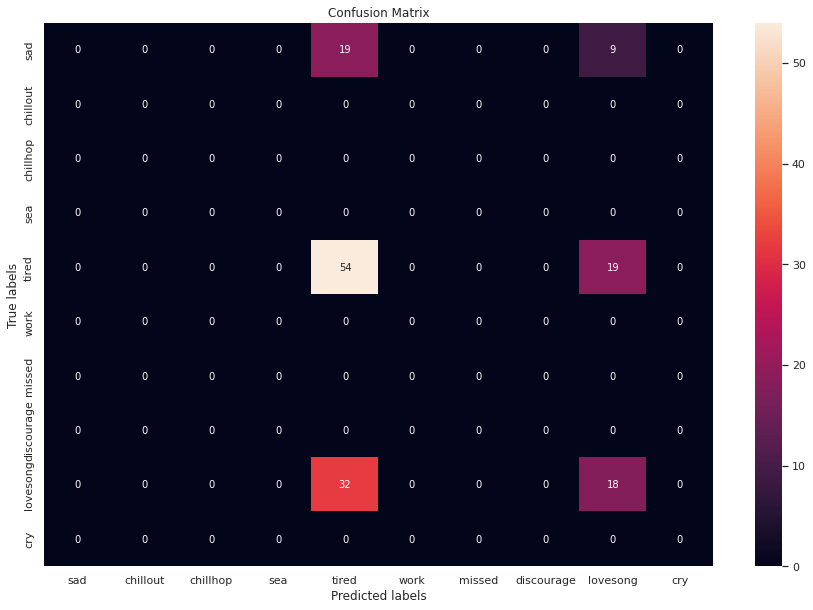

In [122]:
plt.rcParams['figure.figsize'] = (15,10)
ax = plt.subplot()
sn.heatmap(conf_matrix, annot=True)
#labels = data['label'].tolist()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

In [124]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(nn, train_scaled, trainy, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

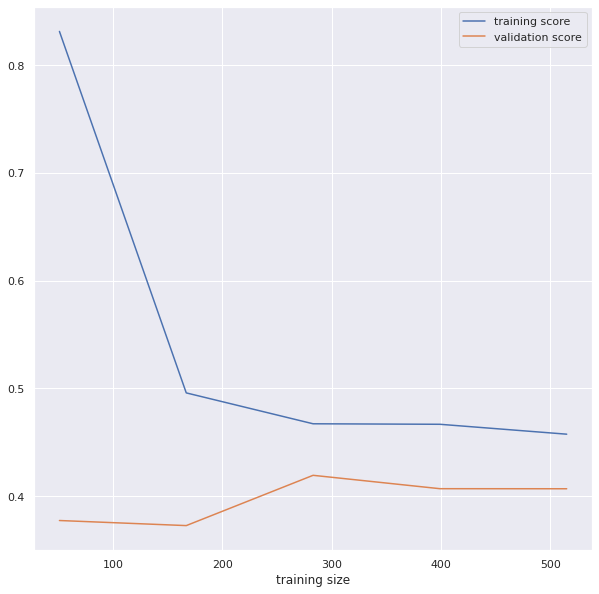

In [125]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='training score')
plt.plot(train_sizes, val_scores_mean, label='validation score')
plt.xlabel('training size')
plt.legend()

##STEP 5.2 ลองกับ Full data

In [126]:
from google.colab import files
uploaded = files.upload()

In [127]:
from google.colab import files
uploaded = files.upload()

In [129]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

features_for_mood = ['energy', 'liveness', 'tempo', 'speechiness',
                                     'acousticness', 'instrumentalness', 'danceability', 'duration_ms',
                                     'loudness', 'valence']

data = pd.read_csv('Full_spotify_data_senior_project64.csv')
hyper_opt = False

In [ ]:
f_trainx = pd.read_csv('full_train.csv',index_col=0)
f_trainx.head()

In [ ]:
f_trainy = f_trainx[['label']]
f_trainy

In [ ]:
f_trainx = f_trainx.drop(['label'], axis=1)
f_trainx

In [ ]:
f_testx = pd.read_csv('full_test.csv',index_col=0)
f_testx.head()

In [ ]:
f_testy = f_testx[['label']]
f_testy

In [ ]:
f_testx = f_testx.drop(['label'], axis=1)
f_testx

In [ ]:
scaler = StandardScaler()
f_train_scaled = scaler.fit_transform(f_trainx)

nn = MLPClassifier(max_iter = 15000, alpha=1.0, hidden_layer_sizes=8)
scores = cross_val_score(nn, f_train_scaled, f_trainy, cv=5)
data = pd.read_csv('Full_spotify_data_senior_project64.csv')
hyper_opt = False
if hyper_opt:
    params = {"alpha": np.logspace(-4, 2, 7), 'hidden_layer_sizes': [1, 2, 5, 10, 20, 50, 100]}
    clf = GridSearchCV(nn, params)
    clf.fit(f_train_scaled, f_trainy)
    print("hyperparam optimized score : " + str(clf.best_score_))
    import pdb
    pdb.set_trace()

In [ ]:
print ("cv score: " + str(scores.mean()))

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
results = cross_validate(nn, f_train_scaled, f_trainy, return_train_score=True)

In [ ]:
results

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=8, max_iter=15000, alpha=1.0)

In [ ]:
nn.fit(f_train_scaled, f_trainy)
f_test_preds = nn.predict(scaler.transform(f_testx))

In [ ]:
accuracy_score(f_test_preds, f_testy)

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(f_testy, f_test_preds, labels = data['label'].unique().tolist())

In [ ]:
labels = data['label'].unique().tolist()

In [ ]:
plt.rcParams['figure.figsize'] = (15,10)
ax = plt.subplot()
sn.heatmap(conf_matrix, annot=True)
#labels = data['label'].tolist()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

In [ ]:
from sklearn.model_selection import learning_curve
f_train_sizes, f_train_scores, f_val_scores = learning_curve(nn, f_train_scaled, f_trainy, cv=5)

In [ ]:
f_train_scores_mean = np.mean(f_train_scores, axis=1)
f_val_scores_mean = np.mean(f_val_scores, axis=1)
plt.plot(f_train_sizes, f_train_scores_mean, label='training score')
plt.plot(f_train_sizes, f_val_scores_mean, label='validation score')
plt.xlabel('training size')
plt.legend()

In [ ]:
f_testx.shape

In [ ]:
f_trainx.shape